# 3. Czyszczenie danych

Przed przystąpieniem do analizy dane należy odpowiednio przygotować. Rzeczywiste dane moga zawierać błedy wynikające z metody pomiaru lub niepoprawnej akwizycji. Niekóre wartości mogą być niezgodne ze zbiorem danych i naszą wiedzą o domenie problemu. W danych mogą występować brakujące wartości lub powtórzenia tych samych pomiarów. Niektóre metody analizy wymagają też odpowiedniego przygotowania danych, np. wykonanie standaryzacji lub zamianę ciągłych wartości na dyskretne (dyskretyzacja) lub dyskretnych - na ciągłe.


Zaczniemy od wczytania przykładowego pliku danych: https://www.is.umk.pl/~grochu/wdm/files/iris-data.csv

Dane zawierają pomiary rozmiarów płatków (petal) oraz rozmiarów liści kielicha (sepal) dokonanych dla 3 odmian Irysów: Setosa, Virginica i Versicolor

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" alt="drawing" width="400"/>


In [1]:
import pandas as pd

iris = pd.read_csv('https://www.is.umk.pl/~grochu/wdm/files/iris-data.csv')

print('Ilość przypadków = %d' % (iris.shape[0]))
print('Ilość zmiennych = %d' % (iris.shape[1]))
iris.head()        # wyswielimy pięc pierwszch wierszy

Ilość przypadków = 154
Ilość zmiennych = 5


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa


## Brakujące wartości

Na pierwszy rzut oka wszystko wydaje się być w porządku. Niemniej jednak pierwsze co powiniśmy sprawdzić to to czy w pliku nie ma braków danych. W tabeli Pandas takie wartości są reprezentowane za pomocą wartości `null`. Sprawdzmy, czy mamy takie dane w pliku za pomocą metody `isnull()`

In [2]:
iris.isnull().values.any()

True

Wygląda na to, że w danych są brakujące wartości. Sprawdzmy ile ich jest w każdej ze zmiennych.

In [3]:
iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

Zobaczmy także jakiego typu są zmienne.

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
sepal_length_cm    154 non-null object
sepal_width_cm     154 non-null float64
petal_length_cm    154 non-null float64
petal_width_cm     149 non-null float64
class              154 non-null object
dtypes: float64(3), object(2)
memory usage: 6.1+ KB


Pierwsza zmienna powinna zawierać wartości numeryczne a jest reprezentowana jako `object`. Naprawdopodobniej w pliku występuje pewna wartość, która nie jest liczbą, dlatego Panda zaimportowała te wartości do typu `object` (w postaci napisów). Spróbujmy zamienić tą zmienną na zmienną nymeryczną za pomocą metody `to_numeric()`. Argument  `errors='coerce'` sprawia, że  wszystkie problematyczne wartości zostaną zamienione na NaN.

In [5]:
sepal_numeric = pd.to_numeric(iris['sepal_length_cm'], errors='coerce')

print('Typ zmiennej: %s' % sepal_numeric.dtype)

print(sepal_numeric)


Typ zmiennej: float64
0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     5.7
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
124    6.3
125    6.7
126    7.2
127    6.2
128    6.1
129    6.4
130    7.2
131    7.4
132    7.9
133    6.4
134    6.3
135    6.1
136    7.7
137    6.3
138    6.4
139    6.0
140    6.9
141    6.7
142    6.9
143    5.8
144    6.8
145    6.7
146    6.7
147    6.3
148    6.5
149    6.2
150    6.7
151    6.2
152    6.2
153    5.9
Name: sepal_length_cm, Length: 154, dtype: float64


Spradzmy, co było problemem. 

In [6]:
print(iris.sepal_length_cm[sepal_numeric.isna()])

118    ?
122    ?
Name: sepal_length_cm, dtype: object


Okazuje się, że dwie wartości w pliku zamiast liczby zawierały znak zapytania (`?`).

Wstawmy poprawioną zmienną we właściwe miejsce w danych.

In [7]:
iris.sepal_length_cm = sepal_numeric
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
sepal_length_cm    152 non-null float64
sepal_width_cm     154 non-null float64
petal_length_cm    154 non-null float64
petal_width_cm     149 non-null float64
class              154 non-null object
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


Jeżeli zależy nam na zachowaniu pomiarów zawierających braki to możemy spróbować wypełnic je odpowiednimi wartościami, np. takimi, które wadają się najbardziej pradopodobne, tj. wartością średnią zmiennej lub wartością modalną. 

In [8]:
iris.sepal_length_cm = iris['sepal_length_cm'].fillna(sepal_numeric.mean())

Jednak najczęściej będziemy chcieli się pozbyć pomiarów posiadających brakujące dane. W przypadku, gdy danych jest dostatecznie dużo nie będzie to miało istotnego wpływu na wynik analizy. 

Usuńmy przypadki, które posiadają braki za pomocą metody `dropna()`.


In [9]:
print("Obecnie w danych jest %d przypadków" % iris.shape[0])

iris = iris.dropna()     # usuwanie wierszy zawierających wartości NaN

print("Po usunięciu braków pozostało %d przypadków" %  iris.shape[0])

Obecnie w danych jest 154 przypadków
Po usunięciu braków pozostało 149 przypadków


## Wartości odstające i inna anomalie


Wypiszmy podstawowe statystyki o danych i sprawdzmy czy występują tam inne anomalie.

In [10]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.670367,3.012081,3.866443,1.253020
std,1.302028,0.546600,1.728912,0.752882
min,0.055000,-1.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.500000,1.400000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Dzieki tego typu tabelkom możemy sprawdzić podstawowe informacje o danych oraz sprawdzić czy pomiary  nie przekraczają rozsądnych przedziałów dla poszczególnych cech.

Cecha `sepal_length_cm` posiada podejrzanie małą wartość minimalną (0.055 cm), zaź wartość minimalna zmiennej `sepal_width_cm` jest ujemna (-1.0). Szerokość i wysokość powinny być wartościami większymi od 0. Najprawdopodobniej jest to wartość błędna i ten pomiar należy usunąć.


Wartości odstające najwygodniej wykryć za pomocą wykresu skrzynkowego. 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.boxplot(data=iris)

Skrzynia określa zakres od 1 do 3 kwartyla z kreską środkową oznaczjąca medianę (wartość środkowa). Punkty leżące za "wąsami" są podejrzane, są to wartości odstające, nietypowe dla rozkładu. 

Potwierdza się, że dwie pierwsze zmienne posiadają odstające wartości. 

Przypadki odstające tj. takie które znajdują się poza zakresem w które wpada większość danych, nie muszą jednoznacznie być błędne. Niemniej jednak należy im się dobrze przyjrzeć. I bardzo rzadko możemy jednoznacznie stwierdzić, czy taka wartość odstające była błędem pomiaru, błędem na poziomie akwizycji czy też wprowadzania danych, czy może faktycznie jest odstępstwem od normy w samym fenomenie, który obserwujemy. 


Zobaczmy najpierw, które przypadki posiadają wartość ujemną, gdyż one z pewnością są błędne.

In [12]:
iris[iris['sepal_width_cm'] < 0.0]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
151,6.2,-1.0,4.8,1.8,Iris-virginica


Jest jeden taki przypadek - usuńmy go.

In [13]:
iris = iris[iris['sepal_width_cm'] > 0.0]

Badając rozkład danych przyjrzyjmy się również rozkładowi danych dla każdej pary zmiennych. Grupy przypadków zaznaczmy róznymi kolorami.

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/marek/.local/lib/python2.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/marek/.local/lib/python2.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python2.7/dist-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/home/marek/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning:

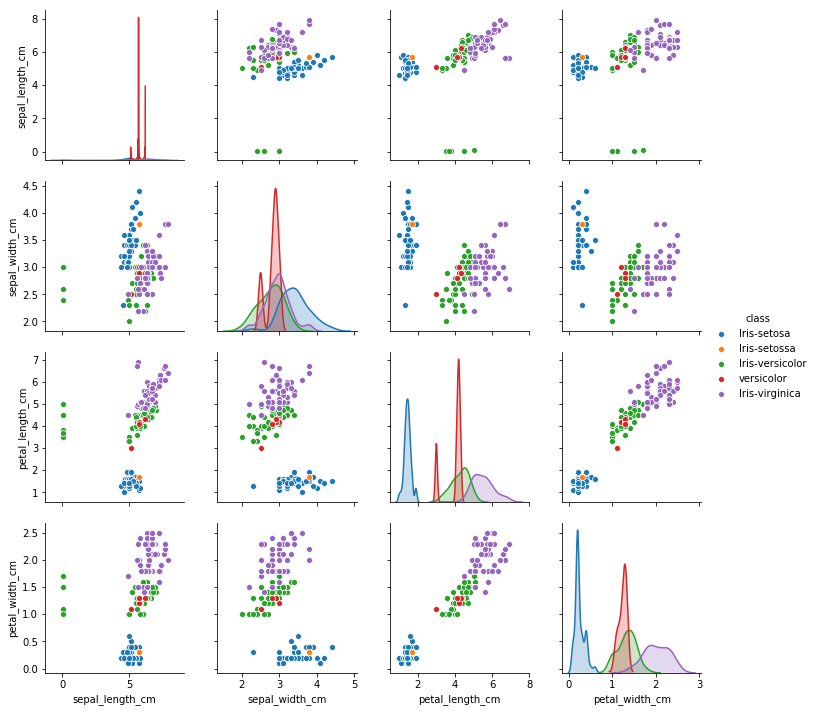

In [14]:
sb.pairplot(iris, hue='class')
plt.show()

Z tego wykresu możemy wysnuć od razu następujące wnioski:
- wartości odstające w zmiennej `sepal_length_cm` są bardzo wyraźnie widoczne i dotyczą odmiany Iris-Versicolor,
- domeana klasy (`class`) ma 5 unikalnych wartości, podczas gdy powinna mieć ich 3.

Zbadajmy najpierw zmienną `class`. Jest to zmienna kategoryczna.

In [15]:
#wypiszmy jakie posiaday unikalne wartośći w kolumnie class
print iris['class'].unique()

iris['class'].value_counts()

['Iris-setosa' 'Iris-setossa' 'Iris-versicolor' 'versicolor'
 'Iris-virginica']


Iris-virginica     53
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

Możemy zauważyć, że musiał nastąpić błąd w kodowaniu danych, podczas wprowadzania danych zostały wykonane dwie literówki. Poprawmy to.

In [16]:
iris.loc[iris['class'] == 'versicolor', 'class'] = 'Iris-versicolor'

# podoby efekt osiągniemy z pomoca metody replace()
iris['class'] = iris['class'].replace('Iris-setossa', 'Iris-setosa')

print iris['class'].unique()
iris['class'].value_counts()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Iris-virginica     53
Iris-versicolor    50
Iris-setosa        45
Name: class, dtype: int64

Przyjrzyjmy się też danym w zmiennej  `sepal_length_cm` odmiany `Iris-versicolor`, które posiadają podejrzanie małe wartości, mniejsze od 2.5cm 

In [17]:
#dla ułatwienia najpier zapiszę sobie indeks do wykrajania dla tych danych
broken_slice_idx = (iris['class'] == 'Iris-versicolor') & (iris['sepal_length_cm'] < 1.0)

iris.loc[broken_slice_idx]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,3.0,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


Możemy wrócić, do tabeli ze statysykami i zauważyć, że wartość `sepal_length_cm` wynosiła średnio 5.6 + 1.3. Wygląda na to że podczas wprowadzania danych zostały pomylone jednostki miary, dane zostały wprowadzone w milimetrach zamiast w cm. Oczywiście to należałoby w jakiś sposób potwierdzić, ale na ten moment zmienmy jednostki dla tych danych.

In [18]:
iris.loc[broken_slice_idx, 'sepal_length_cm'] *= 100.0

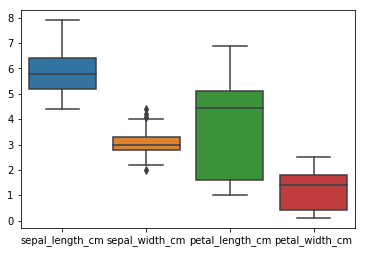

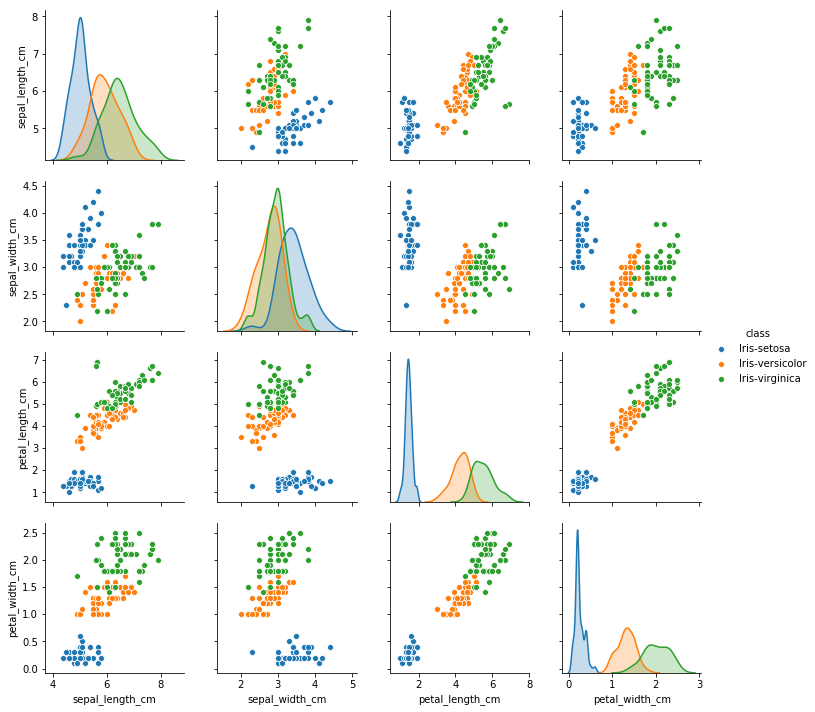

In [19]:
sb.boxplot(data=iris)
sb.pairplot(iris, hue='class')
plt.show()

## Duplikaty



Dane mogą zawierać powtarzające się pomiary, np. w wyniku nieuwagi pomiary jednego obiektu mogły zostać kilkukrotnie wpisane do bazy danych. W przypadku danych Irys nie mamy pewności, czy powtarzające się dane są wynikami uzyskanymi dla  róznych kwiatów. Spróbujmy jednak poszukać powtarzających się wierszy i je usunąć.

Wypiszmy najpierw wszystkie wiersze, które się duplikują.

In [20]:
iris_d = iris.duplicated(keep=False)

iris[iris_d]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
127,6.2,2.8,4.8,1.8,Iris-virginica
143,5.8,2.7,5.1,1.9,Iris-virginica
146,6.7,3.0,5.2,2.3,Iris-virginica
150,6.7,3.0,5.2,2.3,Iris-virginica
152,6.2,2.8,4.8,1.8,Iris-virginica


Argument `keep='first'` metody `duplicated()` pozostawia pierwsze wystąpienie powtarzającego się wiersza i pozwala zaindeksować pozostałe duplikaty. Usuńmy wszytkie (oprócz pierwszewgo) powtarzające się pomiary.

In [21]:
iris_d = iris.duplicated(keep='first')
print('Ilość powtarzających się przypadkóws = %d' % (iris_d.sum()))

print('Liczba przypadków przed selekcją = %d' % (iris.shape[0]))
iris = iris.drop_duplicates()
print('Liczba przypadków po odrzuceniu powtarzających się przypadków  = %d' % (iris.shape[0]))

Ilość powtarzających się przypadkóws = 4
Liczba przypadków przed selekcją = 148
Liczba przypadków po odrzuceniu powtarzających się przypadków  = 144


## Zadanie

Wczytaj dane "Breast Cancer Wisconsin" i przeprowadź preprocesing zgodnie z podanymi poniżej wytycznymi.

Adres danech: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

Dane zawierają wartości opisujące cechy jąder komórkowych obecnych na obrazie uzyskanym przy badaniu piersi dla dwóch grup badanaych: `benign` (złożliwy), `malignat` (łagodny).

Oto lista zmiennych:

```
   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

```

Wszystkie istotne cechy posiadają wartości numeryczne, ostatnia zmienna zawiera informacje o 2 klasach.

1. Wczytaj zbiór danych używając Pandas spod adresu https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data. Dane są w formacie zgodnym z CSV (wartości oddzielone przecinkami). Zwróć uwagę na to, że plik nie posiada nagłowka. Dodaj nazwy zmiennych (kolumn) zgodne z listą podanych wyżej artybutów.
2. Pierwsza zmienna zawiera liczbę porządkową (ID), unikatową dla każdego badanego. Jest ona nieistotna dla analizy - usuń ją ze zbioru.
3. Wartości brakujące w pliku kodowane są za pomocą znaku zapytania (`?`). Sprawdź dla ilu badanych występują braki i w których zmiennych się pojawiają. Zastąp wartości brakujące wartością modalną (zob. funkcja [mode()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html)). Wszystkie cechy (oprócz klasy) powinny być zmiennymi numerycznymi.
4. Sprawdź, czy zbiór danych zawiera przypadki odstające lub nietypowe. Spodzewamy się, że wszystkie zmienne mają wartości od 1 do 10.
5. Usuń ze zbioru przypadki odstające, których wartości zmiennych leżą poza przedziałem $(\bar{x}-3\cdot\sigma, \bar{x}+ 3\cdot\sigma)$, gdzie $\bar{x}$ to wartość średnia cechy, $\sigma$ to odchyenie standardowe.
6. Sprawdź czy dane zawierją powtarzające się pomiary i usuń ze zbioru danych duplikaty.

